<a href="https://colab.research.google.com/github/Komla/fastAI-/blob/main/practice4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai --upgrade --use-feature=2020-resolver
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --use-feature
     |████████████████████████████████| 727kB 12.0MB/s 
     |████████████████████████████████| 1.2MB 35.6MB/s 
     |████████████████████████████████| 194kB 56.5MB/s 
     |████████████████████████████████| 51kB 3.6MB/s 
     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 12.8MB 291kB/s 
     |████████████████████████████████| 776.8MB 25kB/s 
     |████████████████████████████████| 51kB 3.5MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [2]:
!pip install fastprogress
from fastbook import *
from fastai.vision.widgets import *


In [3]:
!pip install -q jmd_imagescraper

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
root = '/content/gdrive/MyDrive/Datasets/'

In [6]:
#from pathlib import Path
#root = Path().cwd()/"cars"



from jmd_imagescraper.core import * # dont't worry, it's designed to work with import *

# Adding parameters tothe images to be downloaded
#params = {
  #  "max_results": 30,             # this can go up to 477 at the time of writing
   # "img_size":    ImgSize.Cached, 
    #"img_type":    ImgType.Photo,
    #"img_layout":  ImgLayout.Square,
    #"img_color":   ImgColor.Purple
#}

#duckduckgo_search(root, "bmw", "bmw", max_results = 30)
#duckduckgo_search(root, "jeep", "jeeps", max_results = 30)
#duckduckgo_search(root, "toyota", "toyota", max_results = 30)
#duckduckgo_search(root, "mercedes-benz","mercedes-benz", max_results = 30)

In [5]:
%ls

gdrive/  sample_data/


In [8]:
# This gets the destination to the root directory

#destination = Path(root)

#path = destination

In [6]:
path = root + 'cars'
path

'/content/gdrive/MyDrive/Datasets/cars'

In [7]:
fns = get_image_files(path)
fns

(#120) [Path('/content/gdrive/MyDrive/Datasets/cars/bmw/001_34ccd3b8.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/002_9a0dbaa9.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/003_cecc2945.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/004_794392e9.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/005_4e5ee627.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/006_e01a9af5.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/007_05f5cfd2.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/008_fd5cc7d5.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/009_6a0f0f08.jpg'),Path('/content/gdrive/MyDrive/Datasets/cars/bmw/010_244d7a93.jpg')...]

In [8]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [9]:
dls = cars.dataloaders(path)

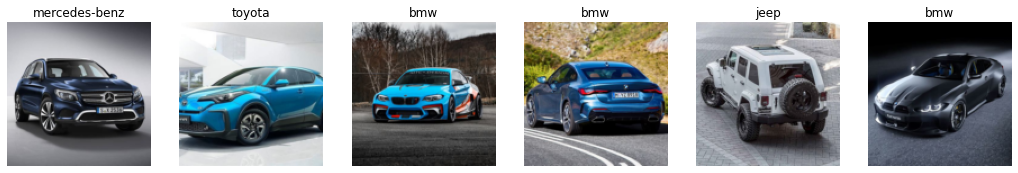

In [11]:
dls.valid.show_batch(max_n=6, nrows=1)

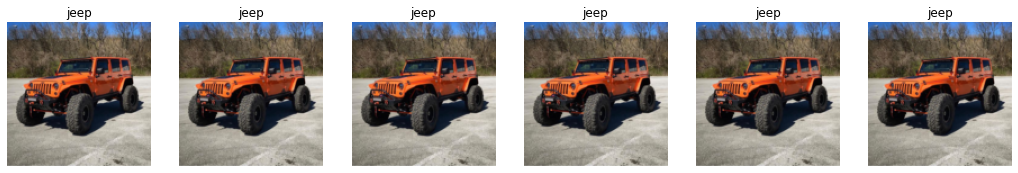

In [12]:
cars = cars.new(item_tfms=RandomResizedCrop(128, min_scale=9))
dls = cars.dataloaders(path)
dls.train.show_batch(max_n=6, nrows=1, unique=True)

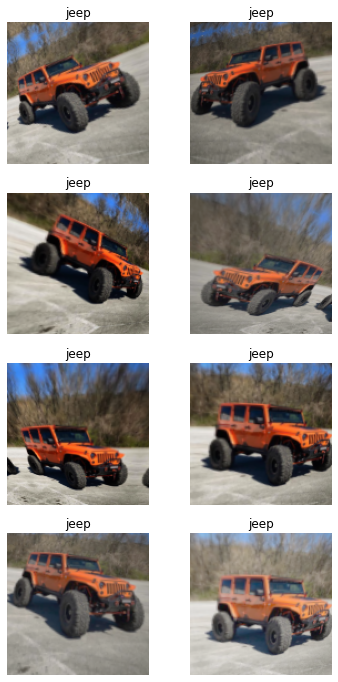

In [13]:
cars = cars.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = cars.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=4, unique=True)

In [14]:
metrics_list = [error_rate,accuracy,]
learn = cnn_learner(dls, resnet18, metrics=metrics_list)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.193555,2.443446,0.625000,0.375000,00:34


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.080202,2.216480,0.625000,0.375000,00:08
1,1.876305,2.055861,0.708333,0.291667,00:08
2,2.003975,1.852885,0.666667,0.333333,00:08
3,1.958928,1.721672,0.666667,0.333333,00:08
4,1.836929,1.632160,0.666667,0.333333,00:08
5,1.760844,1.467791,0.625000,0.375000,00:08
6,1.648707,1.372789,0.541667,0.458333,00:08
7,1.580553,1.336734,0.458333,0.541667,00:08
8,1.491999,1.351104,0.583333,0.416667,00:08
9,1.440426,1.381073,0.541667,0.458333,00:08


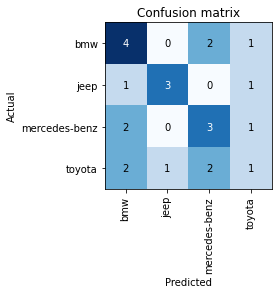

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

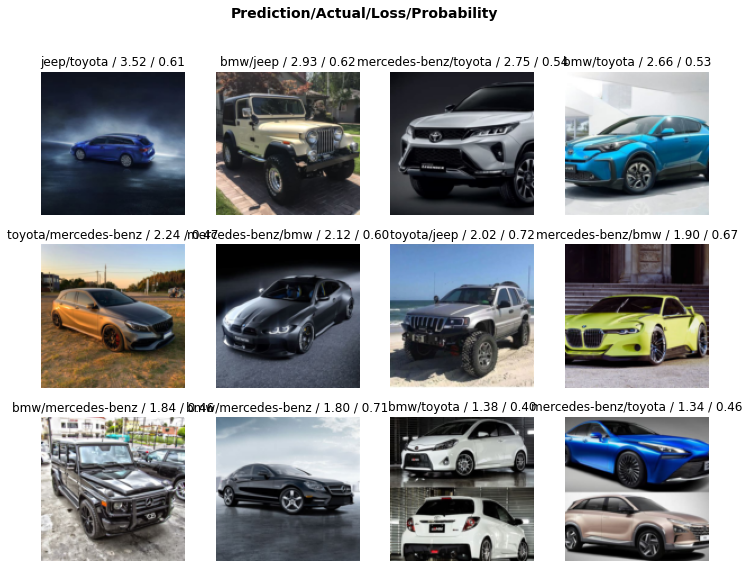

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(12)

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(10)

[]

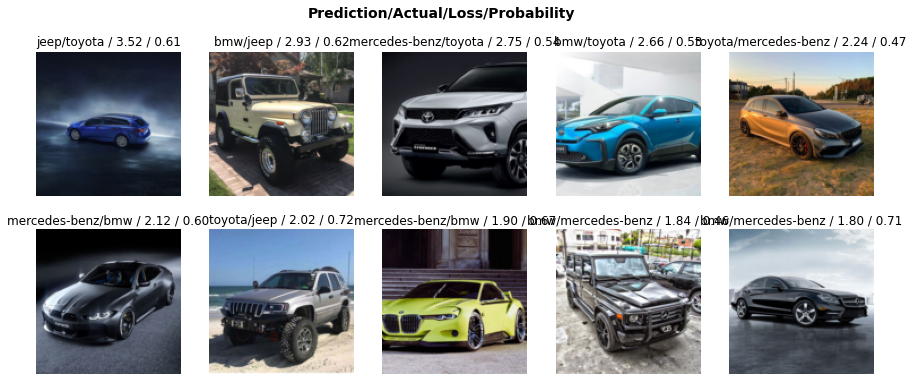

In [19]:
interp.plot_top_losses(10, nrows=2)

In [20]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.275241,1.404944,0.583333,0.416667,00:08
1,1.164967,1.425515,0.541667,0.458333,00:08
2,0.952296,1.419741,0.458333,0.541667,00:08
3,0.868004,1.466195,0.458333,0.541667,00:08
4,0.731815,1.558070,0.541667,0.458333,00:08
5,0.683681,1.642844,0.541667,0.458333,00:08
6,0.612521,1.657425,0.541667,0.458333,00:08
7,0.560763,1.621305,0.541667,0.458333,00:08
8,0.503933,1.569065,0.541667,0.458333,00:08
9,0.469935,1.529945,0.541667,0.458333,00:08


In [21]:
metrics_list = [error_rate,accuracy,]
learn = cnn_learner(dls, resnet34, metrics=metrics_list)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.117547,2.488162,0.666667,0.333333,00:10


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.176343,2.223030,0.708333,0.291667,00:13
1,2.171943,1.816088,0.583333,0.416667,00:13
2,2.206600,1.534454,0.541667,0.458333,00:13
3,2.058208,1.297109,0.541667,0.458333,00:13
4,1.924235,1.192718,0.541667,0.458333,00:13
5,1.795573,1.173835,0.458333,0.541667,00:13
6,1.684220,1.154642,0.458333,0.541667,00:13
7,1.612101,1.163122,0.500000,0.500000,00:13
8,1.520425,1.184131,0.500000,0.500000,00:13
9,1.479902,1.221092,0.500000,0.500000,00:13


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.554668,1.122115,0.458333,0.541667,00:06
1,2.083222,2.193627,0.458333,0.541667,00:07
2,1.896754,4.936717,0.416667,0.583333,00:07
3,1.946785,6.911295,0.625000,0.375000,00:07
4,1.686607,8.040158,0.708333,0.291667,00:07
5,1.541327,9.730494,0.708333,0.291667,00:07
6,1.453663,8.788262,0.708333,0.291667,00:07
7,1.491867,7.632820,0.708333,0.291667,00:07
8,1.448046,6.915684,0.708333,0.291667,00:07
9,1.396833,6.535148,0.708333,0.291667,00:07


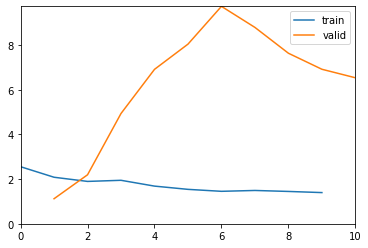

In [19]:
metrics_list = [error_rate,accuracy,]
learn = cnn_learner(dls, resnet18, metrics=metrics_list)
learn.fit_one_cycle(10, slice(5e-3,5e-2),cbs=[ShowGraphCallback()])

SuggestedLRs(lr_min=0.0006309573538601399, lr_steep=0.0003311311302240938)

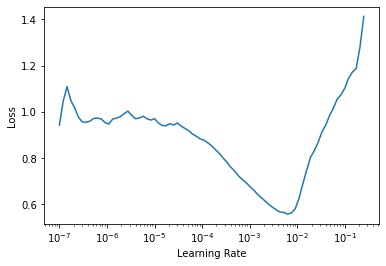

In [26]:
learn.lr_find()

In [ ]:
#hide_output
#cleaner = ImageClassifierCleaner(learn)
#cleaner.learn.export()

In [ ]:
#Unhide this if you want to implement the img cleaner
#for idx in cleaner.delete(): cleaner.fns[idx].unlike()
#for idx,bmw in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/bmw)

In [29]:
learn.export()

In [30]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [31]:
learn_inf = load_learner(path/'export.pkl')

In [32]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [47]:
import ipywidgets as widgets

In [48]:
#img = PILImage.create(btn_upload.data[-1])
img = PILImage.create(btn_upload[-1])
img

TypeError: ignored

In [49]:
out_pl = widgets.Output()
out_pl.clear_output()
out_pl

Output()

In [50]:
with out_pl: display(img.to_thumb(128,128))

In [51]:
lbl_pred = widgets.Label()
lbl_pred.value = 'Choose An Image'
lbl_pred

Label(value='Choose An Image')

In [52]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [53]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred,pred_idx,probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability{ probs[pred_idx]: .04f}'

  btn_run.on_click(on_click_classify)

In [54]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.label('Select your Cat'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix